In [211]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.colors import LinearSegmentedColormap
import time

W = LinearSegmentedColormap.from_list('w', ["w", "w"], N=256)

In [212]:
ACTIONS = {
    0: [1, 0],   # north
    1: [-1, 0],  # south
    2: [0, -1],  # west
    3: [0, 1],   # east
}

In [213]:
class GridWorld:

    def __init__(self,x=7,y=10):

        self.x = x
        self.y = y
        self.nA = len(ACTIONS)
        self.Q =defaultdict(lambda: np.zeros(4))
        self.Final_Reward = 0
        self.Move_Reward = -1
        self.state_values = np.zeros((x,y))
        self.real_policy = defaultdict(lambda: 1)
        self.count = 0

        #Push the agent up 
        self.wind_action_1 = [-1,0]
        self.wind_action_2 = [-2,0]

        self.eps = 1
        self.discount = 1

    def reset(self):
        state = (3,0)
        return state




    def step(self,state,action):
        done = False

        #Check later otherwise program it like state[0] == 3 & state[1] == 7
        if state==(3,7):
            reward = self.Final_Reward
            done = True
            return state,reward,done

        if state[0] == 0:
            next_state = (state[0]+action[0],state[1]+action[1])
            reward = self.Move_Reward

            #Out of Bounds North South
            if next_state[0]<0 or next_state[0]>=(self.x-1):
                next_state = state

            #Out of Bounds East West
            if next_state[1]<0 or next_state[1]>=(self.y-1):
                next_state = state

        #Portion of Grid where wind is 0
        if state[1]<3:
            next_state = (state[0]+action[0],state[1]+action[1])
            reward = self.Move_Reward

            #Out of Bounds North South
            if next_state[0]<0 or next_state[0]>=(self.x-1):
                next_state = state

            #Out of Bounds East West
            if next_state[1]<0 or next_state[1]>=(self.y-1):
                next_state = state

        #Position of Grid where wind is 1
        if state[1]>=3 and state[1]<6 and state[0]!=0:
            new_action = [action[0]+self.wind_action_1[0],action[1]+self.wind_action_1[1]]
            next_state = (state[0]+new_action[0],state[1]+new_action[1])

            #Out of Bounds North South
            if next_state[0]<0 or next_state[0]>=(self.x-1):
                next_state = state

            #Out of Bounds East West
            if next_state[1]<0 or next_state[1]>= (self.y-1):
                next_state = state

        #Position of Grid where wind is 2
        if state[1]>=6 and state[1]<8 and state[0]!=0:

            new_action = [action[0]+self.wind_action_2[0],action[1]+self.wind_action_2[1]]
            next_state = (state[0]+new_action[0],state[1]+new_action[1])

            #Out of Bounds North South
            if next_state[0]<0 or next_state[0]>=(self.x-1):
                next_state = state

            #Out of Bounds East West
            if state[1]<0 or state[1]>= (self.y-1):
                next_state = state

        #Second_Last Position where wind is 1
        if state[1]==7 and state[0]!=0:

            new_action = [action[0]+self.wind_action_1[0],action[1]+self.wind_action_1[1]]
            next_state = (state[0]+new_action[0],state[1]+new_action[1])

            #Out of Bounds North South
            if next_state[0]<0 or next_state[0]>=(self.x-1):
                next_state = state

            #Out of Bounds East West
            if next_state[1]<0 or next_state[1]>=(self.y-1):
                next_state = state
                
        if state[1]>7:

            next_state = (state[0]+action[0],state[1]+action[1])
            reward = self.Move_Reward

            #Out of Bounds North South
            if next_state[0]<0 or next_state[0]>=(self.x-1):
                next_state = state

            #Out of Bounds East West
            if next_state[1]<0 or next_state[1]>=(self.y-1):
                next_state = state

        

        reward = self.Move_Reward

        return next_state,reward,done



    def get_action_prob(self,Q_S):

        action_probs = np.ones(self.nA)*(self.eps/self.nA)
        best_action = np.argmax(Q_S)
        action_probs[best_action] = (1-self.eps) + (self.eps/self.nA)

        return action_probs


    def get_action(self,state):

        action_probs = self.get_action_prob(self.Q[state])
        action = np.random.choice(np.arange(self.nA),p=action_probs) if state in self.Q else np.random.randint(0,4) 

        return action

    def best_value(self):
        return dict((state,np.max(actions)) for state,actions in self.Q.items())



    def best_policy(self):

        return dict((state,np.argmax(actions)) for state,actions in self.Q.items())


    # def random_episode(self):

    #     trajectory = []

    #     state = env.reset()

    #     count = 0

    #     while True:

    #         _action_ = self.get_action(state)
    #         action = ACTIONS.get(_action_)

    #         next_state,reward,done = self.step(state,action)

    #         trajectory.append((state,action,reward))

    #         state = next_state
    #         if count % 5:
    #             print("In Loop {:.5f}".format(count), end="\r")
    #         count +=1
    #         if done:
    #             break

    #     return trajectory



    def Update_Q(self,alpha):


        state = self.reset()

        #Numerical Action
        _action_ = self.get_action(state)
        
        #Selecting real action from Dictionary
        action = ACTIONS.get(_action_)

        

        while True:
            
            self.count +=1
            next_state,reward,done = self.step(state,action)
            
            #Numerical Action
            _next_action_ = self.get_action(next_state)

            #Real Action
            next_action = ACTIONS.get(_next_action_)


            if done:
                #Setting Q for next state as 0 
                self.Q[next_state][_next_action_] = 0
                
            self.Q[state][_action_] +=  alpha*(reward + self.discount*self.Q[next_state][_next_action_] - self.Q[state][_action_])
          

            #Setting the next state and actions to current
            state = next_state
            _action_ = _next_action_
            action = next_action

            if done:
                break
            
        return self.Q




    def TD_Sarsa(self,iters,alpha):

        EPISODE = []
        TIME_STEP = []

        for episdoes in range(iters):
            if episdoes % 5 == 0:
                print("In Loop {:.5f}".format(episdoes), end="\r")
            self.Q = self.Update_Q(alpha)
            
            #Changing the decaying eps to fixed uncommet for chaning to 1/k
            # self.eps = (1/(episdoes+1))
            self.eps = 0.1
            
            TIME_STEP.append(self.count)
            EPISODE.append(episdoes)

        policy = self.best_policy()

        real_policy = self.Real_Actions(policy)
        value = self.best_value()
        state_values = self.Real_Value(value)
        plt.plot(TIME_STEP, EPISODE)
        plt.title('Time_STEP vs EPISODE')
        plt.xlabel('Time_STEP')
        plt.ylabel('EPISODE')
        plt.show()

        return self.Q,real_policy,self.state_values



    def Real_Actions(self,policy):
        states_ava = []
        for i in policy:
            states_ava.append(i)
            
        actions_ava = []
        for state in states_ava:
            action = policy.get(state)
            real_a = ACTIONS[action]
            self.real_policy[state] = real_a 
            
        return self.real_policy

    def Real_Value(self,value):

        for x in value.items():
            self.state_values[x[0]] = x[1]

        return self.state_values
            




In [214]:
env = GridWorld()

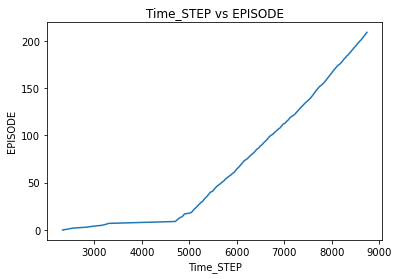

Printing State Value:
[[-17.16993158 -16.83708906 -12.3344212  -10.57861803  -9.71214205
   -8.18473765  -6.53397965  -5.14454148  -4.02018501   0.        ]
 [-17.18675183 -16.98832101 -15.01029772 -10.49806069  -9.91559092
  -11.43365387  -9.29109485  -7.5271034   -3.00105157   0.        ]
 [-17.57853539 -16.47841848 -14.48637294 -11.01443838 -10.59072402
   -9.27216777  -9.35317825  -7.56198662  -2.00000129   0.        ]
 [-14.90005115 -15.78877899 -14.122621   -11.08628741 -14.20399836
  -11.17568221   0.           0.          -1.           0.        ]
 [-17.60268245 -16.19567642 -15.64068636 -13.69522752 -12.32075702
    0.           0.          -0.5         -0.875        0.        ]
 [-17.23214012 -16.23305312 -15.31318008 -13.64656499   0.
    0.           0.           0.          -0.75         0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]]


Printing Policy:
defaultdict(<function GridWor

In [215]:
iters = int(input('Enter Number Of Iters: '))
alpha = 0.5
Q,policy,value = env.TD_Sarsa(iters,alpha)

print('Printing State Value:')
print(value)
print('\n')
# time.sleep(5)

print('Printing Policy:')
print(policy)
print('\n')
# time.sleep(5)

print('Printing State Action Pairs:')
print(Q)
print('\n')
# time.sleep(5)